# Accessing data from a web API

One of the best things about "web 2.0" is more formal, external facing API's to allow developers to build tools on top of data. These APIs provide a reliable connection to data over a reliable protocol returning a reliable response in an easy, machine-readable format. There are tons of APIs out there. Sometimes you will need to register for a developer key (see the St. Louis Fed's API [here](https://research.stlouisfed.org/docs/api/)) and other times the APIs are free (see Coindesk's API [here](https://www.coindesk.com/api)). ProgrammableWeb has a great [directory](https://www.programmableweb.com/apis/directory).

## With great power comes great responsibility. We should be responsible and polite internet citizens when hitting websites programmatically

Below we will use Coindesk's API to get daily prices for bitcoin. Coindesk's API, like many others, returns a JSON (javascript object notation) object, which we can easily turn into a dataframe. Here we will need the `json` and `requests` libraries.

In [1]:
import datetime

import json
import requests

coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

# from API
start = datetime.date(2019, 1 ,1)
end = datetime.date(2019, 7, 1)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

print(f'Hitting this url:{url}')

result = requests.get(url)
result.content

Hitting this url:https://api.coindesk.com/v1/bpi/historical/close.json?start=2019-01-01&end=2019-07-01


b'{"bpi":{"2019-01-01":3869.47,"2019-01-02":3941.2167,"2019-01-03":3832.155,"2019-01-04":3863.6267,"2019-01-05":3835.5983,"2019-01-06":4083.165,"2019-01-07":4041.4583,"2019-01-08":4029.9917,"2019-01-09":4028.2917,"2019-01-10":3669.5825,"2019-01-11":3660.9583,"2019-01-12":3658.6725,"2019-01-13":3540.1583,"2019-01-14":3706.1725,"2019-01-15":3604.1333,"2019-01-16":3630.2567,"2019-01-17":3665.41,"2019-01-18":3630.785,"2019-01-19":3708.9633,"2019-01-20":3552.8933,"2019-01-21":3548.69,"2019-01-22":3598.2183,"2019-01-23":3576.01,"2019-01-24":3598.2717,"2019-01-25":3582.2,"2019-01-26":3580.775,"2019-01-27":3553.0133,"2019-01-28":3454.48,"2019-01-29":3421.12,"2019-01-30":3482.3,"2019-01-31":3441.985,"2019-02-01":3468.2517,"2019-02-02":3466.2175,"2019-02-03":3443.1667,"2019-02-04":3451.115,"2019-02-05":3472.035,"2019-02-06":3393.6717,"2019-02-07":3385.97,"2019-02-08":3657.4017,"2019-02-09":3654.3,"2019-02-10":3681.0517,"2019-02-11":3621.0283,"2019-02-12":3622.7133,"2019-02-13":3605.3133,"2019-02

Digging into this a little bit, there are a few critical components to accessing data. Not all APIs will return the same structure of data. Many times you can look at what is returned by just hitting the URL with your browser. Let's try that

[https://api.coindesk.com/v1/bpi/historical/close.json?start=2019-01-01&end=2019-07-01](https://api.coindesk.com/v1/bpi/historical/close.json?start=2019-01-01&end=2019-07-01)


In this case we get:
```
{
    "bpi":
    {
        "2019-01-01":3869.47,
        "2019-01-02":3941.2167,
        ...
    },
    "disclaimer": "This data was produced from the CoinDesk Bitcoin Price Index.",
    "time":
    {
        "updated":"Jul 2, 2019 00:03:00 UTC",
        "updatedISO":"2019-07-02T00:03:00+00:00"
    }
}
```

`bpi`, `disclaimer`, and `time` are all data that we can reference. The data we're primarily interested in is `bpi`. Different APIs can break up data differently, we will see examples in other APIs later.

Let's take a look at the json result in python.

In [2]:
jsondata = json.loads(result.content)
jsondata

{'bpi': {'2019-01-01': 3869.47,
  '2019-01-02': 3941.2167,
  '2019-01-03': 3832.155,
  '2019-01-04': 3863.6267,
  '2019-01-05': 3835.5983,
  '2019-01-06': 4083.165,
  '2019-01-07': 4041.4583,
  '2019-01-08': 4029.9917,
  '2019-01-09': 4028.2917,
  '2019-01-10': 3669.5825,
  '2019-01-11': 3660.9583,
  '2019-01-12': 3658.6725,
  '2019-01-13': 3540.1583,
  '2019-01-14': 3706.1725,
  '2019-01-15': 3604.1333,
  '2019-01-16': 3630.2567,
  '2019-01-17': 3665.41,
  '2019-01-18': 3630.785,
  '2019-01-19': 3708.9633,
  '2019-01-20': 3552.8933,
  '2019-01-21': 3548.69,
  '2019-01-22': 3598.2183,
  '2019-01-23': 3576.01,
  '2019-01-24': 3598.2717,
  '2019-01-25': 3582.2,
  '2019-01-26': 3580.775,
  '2019-01-27': 3553.0133,
  '2019-01-28': 3454.48,
  '2019-01-29': 3421.12,
  '2019-01-30': 3482.3,
  '2019-01-31': 3441.985,
  '2019-02-01': 3468.2517,
  '2019-02-02': 3466.2175,
  '2019-02-03': 3443.1667,
  '2019-02-04': 3451.115,
  '2019-02-05': 3472.035,
  '2019-02-06': 3393.6717,
  '2019-02-07': 338

We can then wrap that up in to a pandas dataframe! Note: pandas does have a `read_json` helper as well, but sometimes it is not well suited given the structure of the json output.

In [3]:
# note the json gets read with the disclaimer and time outputs as well
data = pd.read_json(result.content)
data

,bpi,disclaimer,time
2019-01-01,3869.4700,This data was produced from the CoinDesk Bitco...,NaN
2019-01-02,3941.2167,This data was produced from the CoinDesk Bitco...,NaN
2019-01-03,3832.1550,This data was produced from the CoinDesk Bitco...,NaN
2019-01-04,3863.6267,This data was produced from the CoinDesk Bitco...,NaN
2019-01-05,3835.5983,This data was produced from the CoinDesk Bitco...,NaN
2019-01-06,4083.1650,This data was produced from the CoinDesk Bitco...,NaN
2019-01-07,4041.4583,This data was produced from the CoinDesk Bitco...,NaN
2019-01-08,4029.9917,This data was produced from the CoinDesk Bitco...,NaN
2019-01-09,4028.2917,This data was produced from the CoinDesk Bitco...,NaN
2019-01-10,3669.5825,This data was produced from the CoinDesk Bitco...,NaN


In [4]:
data = pd.DataFrame({'Bitcoin Price Index': jsondata['bpi']})
data

,Bitcoin Price Index
2019-01-01,3869.4700
2019-01-02,3941.2167
2019-01-03,3832.1550
2019-01-04,3863.6267
2019-01-05,3835.5983
2019-01-06,4083.1650
2019-01-07,4041.4583
2019-01-08,4029.9917
2019-01-09,4028.2917
2019-01-10,3669.5825


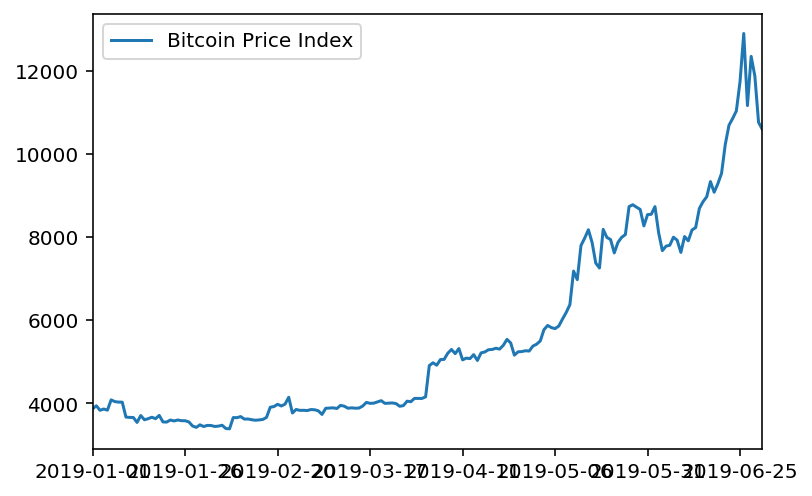

In [5]:
%matplotlib inline
data.plot()